# The Sparks Foundation
##Task-2 Predict the optimum number of cluster on iris dataset

![](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)






import the libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

load the iris dataset

In [12]:
from sklearn import datasets
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## find the optimum value of n-cluster
### for finding a best value of no. of cluster ,it is a graphical formation plot between x and y
###where
### x= number of cluster
###      y=wcss(within cluster sum of square)

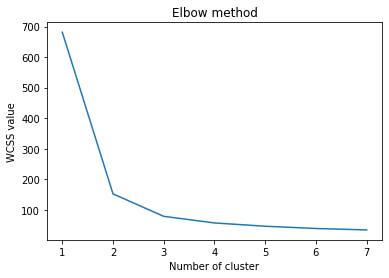

In [13]:
from sklearn.cluster import KMeans

wcss=[]

for i in range(1,8):
  model=KMeans(n_clusters=i,init='k-means++',random_state=42)
  model.fit(data)
  wcss.append(model.inertia_)

plt.plot(range(1,8),wcss)
plt.title('Elbow method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS value')
plt.show()


##Elbow curve--- 
###A point where the curve started continiouly decreases that is the optimum value of k
### the curve is continiouly decreses after the 3 so k=3 is optimum value

In [15]:
x=data.iloc[:,[0,1,2,3]].values

apply K-Mean clustering on the dataset

In [21]:
model=KMeans(n_clusters=3,init='k-means++',random_state=42)


y_pred=model.fit_predict(x)

print(y_pred)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


## Visualising the clusters-for first 2 columns


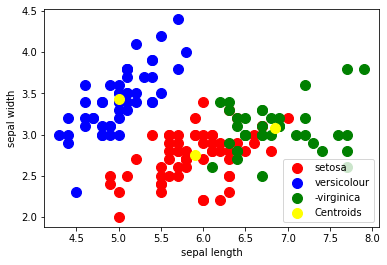

In [27]:
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1],
            s = 100, c = 'red', label = 'setosa')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], 
            s = 100, c = 'blue', label = 'versicolour')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1],
            s = 100, c = 'green', label = '-virginica')

# Plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.xlabel('sepal length')
plt.ylabel('sepal width')

plt.legend()